# <center> PHY 102 Lab - Introduction to Jupyter</center>
### <center>University of Mount Union</center>

Refer to the handout for instructions!

## Step 1

In [2]:
print("Hello World!") 

Hello World!


## Step 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint
from matplotlib.widgets import Slider
# use widget on the online binder; notebook
# may work better on a local machine:
# %matplotlib notebook
%matplotlib widget

print("All done!")

All done!


## Step 3

In [4]:
# The code below is missing a parenthesis
# Also, the object referenced at the end of 
# line 5 isn't correct
name = "PHY 102"
print("This course is {0}".format(course)

SyntaxError: incomplete input (3410168066.py, line 5)

## Step 4

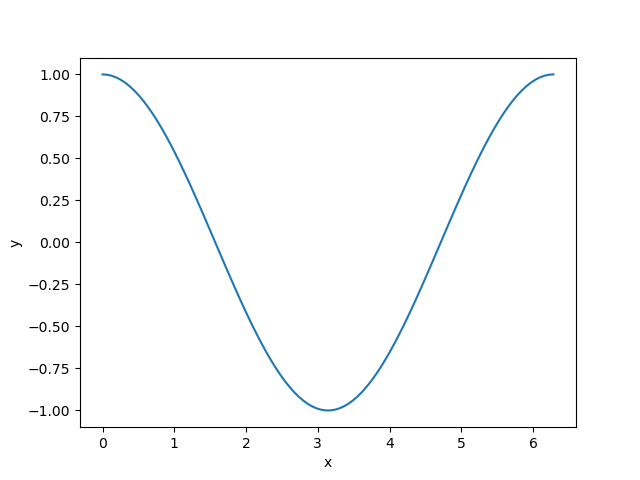

In [5]:
# Create the values for the x axis
# x will be an array of 100 evenly spaced
# values from 0 to 2pi
x = np.linspace(0,2*np.pi,100)
 
# Perform some mathematics on x.
# We use Numpy ("np.") to immediately perform math
# on every value in the array
y = np.cos(x)

# make a simple figure
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Step 5

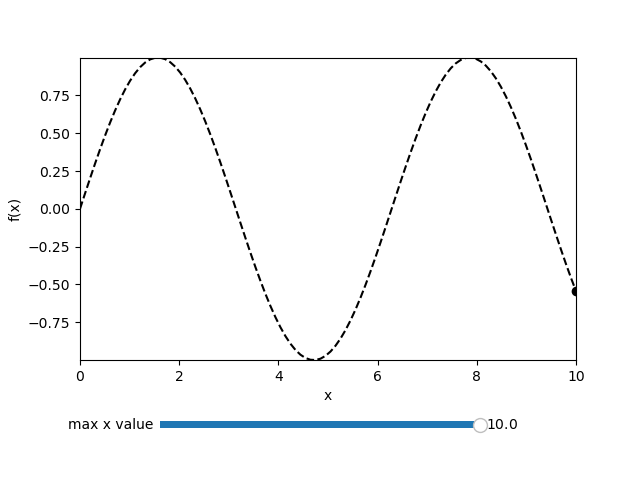

In [6]:
# You should only modify line 6!

def f(t):
    # The function that draws the curve to the specified value of t
    x = np.linspace(0,t,100)
    y = np.sin(x)
    return x,y

def update(val):
    # The function to be called anytime a slider's value changes
    x,y = f(time_slider.val)
    line.set_data(x,y)
    marker.set_offsets([x[-1],y[-1]])
    fig.canvas.draw_idle()

init_time = 10

# Make the figure
fig, ax = plt.subplots()
x,y = f(init_time)
                  
# make the line and dot
marker = plt.scatter(x[-1],y[-1],color='k')  
line, = plt.plot(x,y,'k--')
                  
# Set the viewing window
plt.xlim(min(x),max(x))                    
plt.ylim(min(y),max(y))

plt.xlabel('x')
plt.ylabel('f(x)')

# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the max time.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='max x value',
    valmin=0.1,
    valmax=10,
    valinit=init_time,
)

# Bind the update function to the axis
time_slider.on_changed(update)
                  
plt.show()

## Step 6

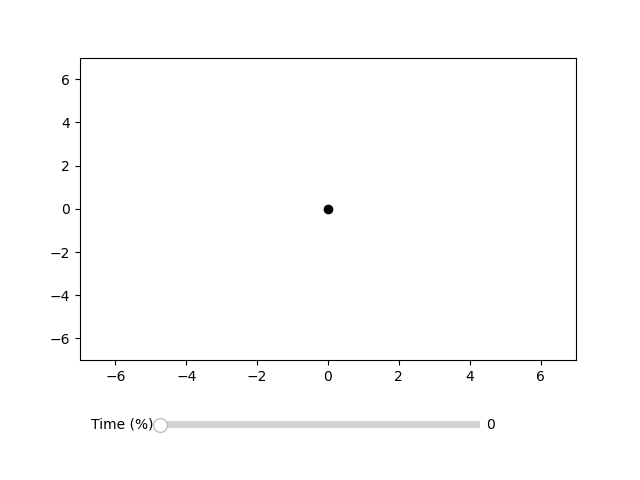

In [7]:
# Only modify lines around 18-29!

# time step
dt = 0.1

# velocity
v = 1

# we'll manually build the x and y positions of the marker
# start with a list of 0 values: it starts at the origin
x = [0]
y = [0]

for t in range(100):
    # we'll execute the indented code (lines 13-26)
    # 100 times
    
    if t < 50:
        # Do something for the first half
        
        # x[-1] refers to the most recent value.
        # So, the next value is the most recent value
        # plus or minus something
        x.append(x[-1] + v*dt)
        y.append(y[-1] + 0)
    else:
        # Do something different for the second half
        x.append(x[-1] + 0)
        y.append(y[-1] + v*dt)

def update(val):
    # The function to be called anytime a slider's value changes
    line.set_data(x[:time_slider.val],y[:time_slider.val])
    marker.set_offsets([x[time_slider.val],y[time_slider.val]])
    fig.canvas.draw_idle()
    
# Make the figure
fig,ax = plt.subplots()
marker = plt.scatter(x[0],y[0],color='k')  # Draw a dot and a line
line, = plt.plot([],[],'k--')
plt.xlim(-7,7)                             # Set the viewing window
plt.ylim(-7,7)

# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the frequency.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time (%)',
    valstep = list(range(100)),
    valmin = 0,
    valmax = 99,
    valinit=0,
)

# Bind the update function to the axis
time_slider.on_changed(update)

plt.show()


        

## Step 7

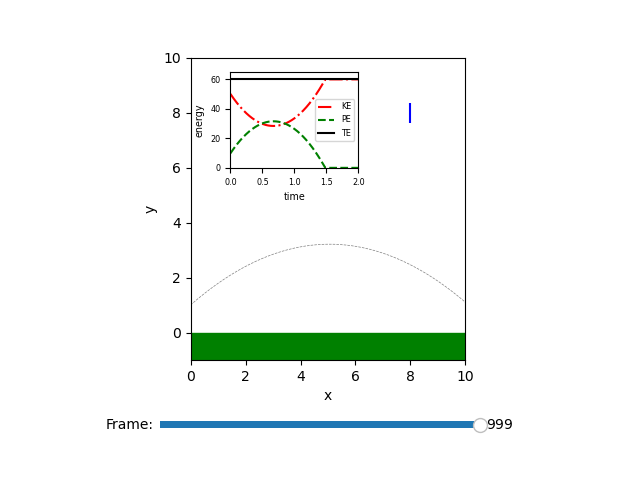

In [10]:
#Parameter value (edit this)     
theta = 41.186   # in degrees

# ====================================
# Don't edit anything below this line
# except for a 1 line tweak inside the
# "derivs" function!
# ====================================

# Functions
def derivs(params,t):
    # Solves ODE for motion of particle q
    
    # what are the current positions and velocities
    # of the projectile and the falling target?
    x,y,vx,vy,y_targ,vy_targ = params
    
    # stop if the ball hits the ground
    if y <= 0: return 0,0,0,0,0,0
    
    # derivative of position is velocity
    x_deriv = vx
    y_deriv = vy
    
    # derivative of velocity is acceleration
    vx_deriv = 0
    vy_deriv = -g
    
    # and for the target...
    y_targ_deriv = vy_targ
    vy_targ_deriv = 0
    
    # return the derivatives
    return x_deriv,y_deriv,vx_deriv,vy_deriv,y_targ_deriv,vy_targ_deriv

def update(val):
    # Used to update animated figure
    marker.set_offsets([xpoints[time_slider.val],
                        ypoints[time_slider.val]])
    line.set_data(xpoints[:time_slider.val],
                  ypoints[:time_slider.val])
    
    line_KE.set_data(tpoints[:time_slider.val],
                     KE[:time_slider.val])
    line_PE.set_data(tpoints[:time_slider.val],
                     PE[:time_slider.val])
    line_TE.set_data(tpoints[:time_slider.val],
                     TE[:time_slider.val])
    
    marker_targ.set_offsets([8,ypoints_targ[time_slider.val]])
    fig.canvas.draw_idle()

# Parameters and initial conditions
m = 1
g = 9.8
v0 = 10 
theta = math.radians(theta)
vx0 = v0*math.cos(theta)
vy0 = v0*math.sin(theta)
x0 = 0
y0 = 1
y_targ0 = 8
vy_targ0 = 0

tpoints = np.linspace(0,2,1000)         # time

# solve the differential equations
output = odeint(derivs,[x0,y0,vx0,vy0,y_targ0,vy_targ0],tpoints) 

# parse out results
xpoints = output[:,0]                   
ypoints = output[:,1]
vxpoints = output[:,2]
vypoints = output[:,3]
ypoints_targ = output[:,4]
vypoints_targ = output[:,5]

KE = 0.5*m*(vxpoints**2 + vypoints**2)  # calculate kinetic energy
PE = m*g*ypoints                        # calculate potential energy
TE = KE+PE                              # calculate total energy

# Make initial figure (this is gross; ignore it :D )
fig = plt.figure()

# main panel
ax1 = plt.subplot(111)
line, = plt.plot(xpoints,ypoints,c='0.5',lw=0.5,ls='--')
marker = ax1.scatter(xpoints[-1],ypoints[-1],marker='o',s=30,c='k')
marker_targ = ax1.scatter(8,ypoints_targ[-1],marker='|',s=200,c='b')
ax1.set_xlim(0,10)
ax1.set_ylim(-1,10)
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.set_aspect('equal')
plt.fill_between([0,10],y1=0,y2=-1,color='green')

# inset plot for energies
ax2 = fig.add_axes([0.36,0.65,0.2,0.2])
line_KE, = ax2.plot(tpoints,KE,'r-.',label='KE')
line_PE, = ax2.plot(tpoints,PE,'g--',label='PE')
line_TE, = ax2.plot(tpoints,TE,'k-',label='TE')
ax2.set_xlim(0,tpoints[-1])
ax2.set_ylim(np.min(np.hstack((KE,PE,TE)))-0.1,np.max(np.hstack((KE,PE,TE)))+5)
ax2.set_xlabel('time',size='x-small')
ax2.set_ylabel('energy',size='x-small')
ax2.xaxis.set_tick_params(labelsize='xx-small')
ax2.yaxis.set_tick_params(labelsize='xx-small')
ax2.legend(loc='center right',fontsize='xx-small')

# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the frequency.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Frame:',
    valstep = list(range(1000)),
    valmin = 0,
    valmax = 999,
    valinit=999,
)

# Bind the update function to the axis
time_slider.on_changed(update)


plt.show()
